In [1]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Reading the Data set using Data Frames

In [2]:
# reading the dataset using pandas as read_csv
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# creating a new data frame with these columns mentioned below
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


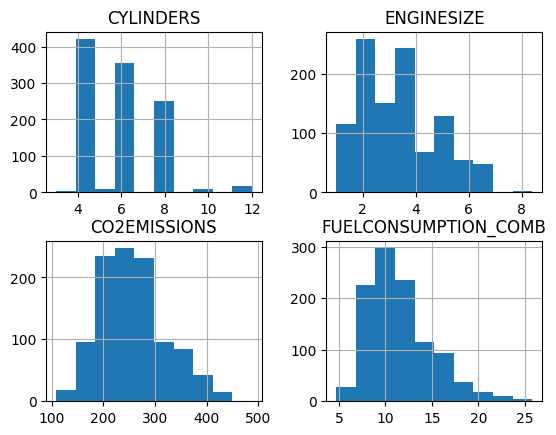

In [5]:
# creates a new data frame with these columns mentioned inside the two square brackets
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
# viz.head(9)
viz.hist()
plt.show()

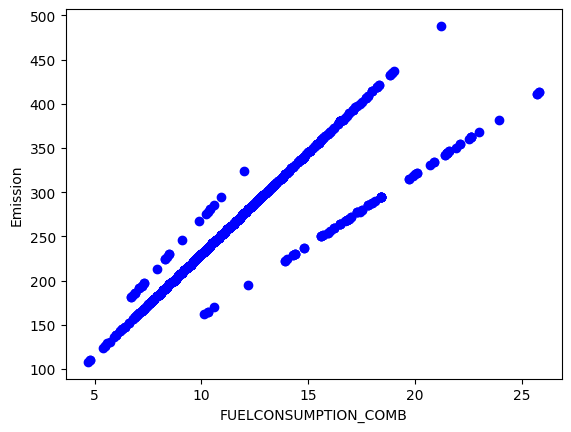

In [6]:
# we are plotting the scatter plot here with the columns FUELCONSUMPTION_COMB & CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

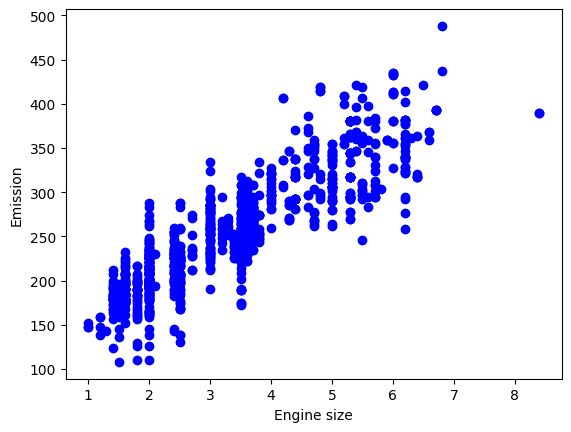

In [7]:
# we are plotting scatter plot for the ENGINESIZE & CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

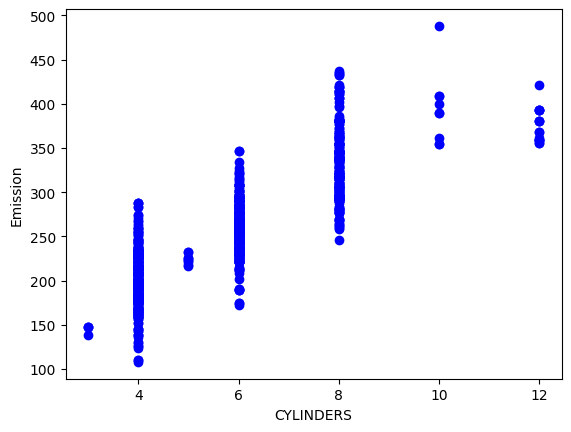

In [8]:
# we are plotting scatter plot for the CYLINDERS & CO2EMISSIONS
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [9]:
# this code randomly splits the DataFrame cdf into training and
# testing datasets, with approximately 80% of the data used for
# training and 20% for testing. This is a common technique used in
# machine learning to evaluate model performance on unseen data.
msk = np.random.rand(len(df)) < 0.8
print(msk)
train = cdf[msk] #80% data for training
test = cdf[~msk] # 20% data for testing
print(train)
print(test)

[ True  True  True ... False False  True]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1058         3.0          6                  11.5           264
1059         3.2          6                  10.2           235
1060         3.0          6                  11.5           264
1062         3.0          6                  11.8           271
1066         3.2          6                  12.8           294

[865 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
6            3.5          6                  10.1           232
7            3.7          6           

Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation

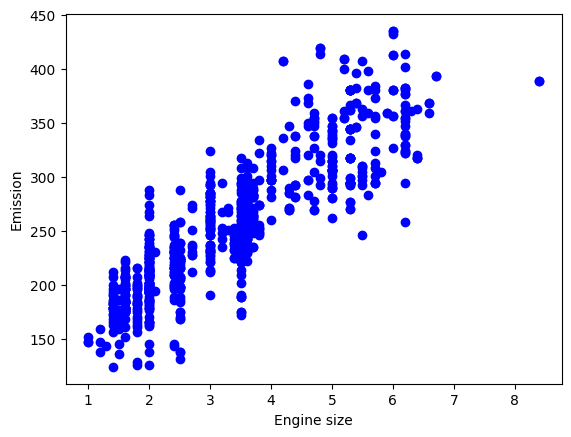

In [10]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Modeling**
Using sklearn package to model data.

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_) # it is the θ1 slope
print ('Intercept: ',regr.intercept_) # it is the θ0 intercept

Coefficients:  [[38.52292793]]
Intercept:  [126.65708089]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Plot outputs


We can plot the fit line over the data:

Text(0, 0.5, 'Emission')

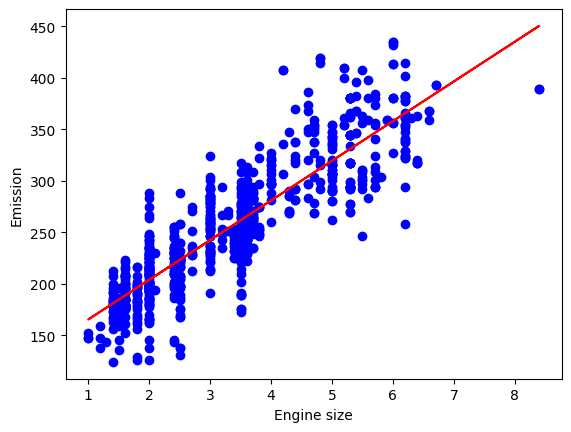

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
# y = mx+c =  θ1 slope * train_x(mx) + θ0 intercept(c)
# we are plotting our train_x with the find out mx+c values and the color is red.
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.44
Residual sum of squares (MSE): 1079.26
R2-score: 0.76


In [14]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

In [15]:
# training our model by linear regression
# taking train x as FUELCONSUMPTION_COMB and Y as CO2EMISSIONS
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_) # it is the θ1 slope
print ('Intercept: ',regr.intercept_) # it is the θ0 intercept



Coefficients:  [[15.93023142]]
Intercept:  [71.05613632]


In [16]:
#Find the predictions using the model's predict function and the test_x data
predictions = regr.predict(test_x)
print(predictions)

[[231.95147364]
 [247.88170506]
 [319.56774644]
 [230.3584505 ]
 [230.3584505 ]
 [203.27705709]
 [249.4747282 ]
 [303.63751502]
 [284.52123732]
 [271.77705219]
 [268.5910059 ]
 [265.40495962]
 [216.02124222]
 [235.13751993]
 [294.07937617]
 [373.73053326]
 [228.76542736]
 [209.64914966]
 [216.02124222]
 [273.37007533]
 [273.37007533]
 [273.37007533]
 [273.37007533]
 [305.23053817]
 [290.89332989]
 [305.23053817]
 [290.89332989]
 [290.89332989]
 [230.3584505 ]
 [254.25379763]
 [201.68403395]
 [228.76542736]
 [227.17240422]
 [223.98635793]
 [231.95147364]
 [249.4747282 ]
 [231.95147364]
 [251.06775134]
 [252.66077449]
 [306.82356131]
 [335.49797786]
 [306.82356131]
 [252.66077449]
 [259.03286705]
 [273.37007533]
 [262.21891334]
 [195.31194138]
 [262.21891334]
 [403.99797296]
 [431.07936637]
 [333.90495472]
 [431.07936637]
 [370.54448698]
 [480.46308376]
 [203.27705709]
 [196.90496452]
 [180.9747331 ]
 [364.17239441]
 [290.89332989]
 [290.89332989]
 [271.77705219]
 [204.87008023]
 [300.45

Text(0, 0.5, 'Emission')

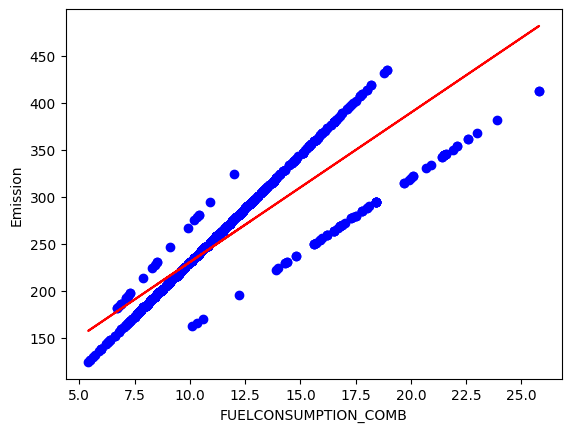

In [17]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
# y = mx+c =  θ1 slope * train_x(mx) + θ0 intercept(c)
# we are plotting our train_x with the find out mx+c values and the color is red.
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
# it is the mean of distance between the fit line and the points above and below that.
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
# we are squaring the above mean absolute error
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 19.70
Residual sum of squares (MSE): 742.41
R2-score: 0.84
